In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("Loan.xlsx")

In [3]:
df.head(5)

,Education,Self_Employed,ApplicantIncome,Property_Area,country,Loan_Status
0,Graduate,No,5849.0,Urban,Fairfield,Y
1,Graduate,No,4583.0,Rural,Fairfield,N
2,Graduate,Yes,3000.0,Urban,Fairfield,Y
3,Not Graduate,No,2583.0,Urban,Fairfield,Y
4,Graduate,No,6000.0,Urban,Fairfield,Y


In [4]:
dff = df.copy()

In [5]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [6]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [7]:
df['country'].unique()

array(['Fairfield', 'Hartford', 'Litchfield', 'Middlesex', 'Connecticut'],
      dtype=object)

# Label Encoding

In [8]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['Property_Area'] = label_encoder.fit_transform(df['Property_Area'])
df['Property_Area'].unique()

array([2, 0, 1])

In [9]:
df.head()

,Education,Self_Employed,ApplicantIncome,Property_Area,country,Loan_Status
0,Graduate,No,5849.0,2,Fairfield,Y
1,Graduate,No,4583.0,0,Fairfield,N
2,Graduate,Yes,3000.0,2,Fairfield,Y
3,Not Graduate,No,2583.0,2,Fairfield,Y
4,Graduate,No,6000.0,2,Fairfield,Y


In [10]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['Urban', 'Rural', 'Semiurban']])
df['Property_Area'] = encoder.fit_transform(dff[['Property_Area']])
df['Property_Area'].unique()


array([0., 1., 2.])

## One Hot Encoding

In [11]:
df['country'].unique()

array(['Fairfield', 'Hartford', 'Litchfield', 'Middlesex', 'Connecticut'],
      dtype=object)

In [12]:
### Only used for data analysis and not for machine learning. It is a type of OneHot Encoder bit not suitabel for M
df = pd.get_dummies(dff, columns = ['country'])

In [13]:
df.head()

,Education,Self_Employed,ApplicantIncome,Property_Area,Loan_Status,country_Connecticut,country_Fairfield,country_Hartford,country_Litchfield,country_Middlesex
0,Graduate,No,5849.0,Urban,Y,0,1,0,0,0
1,Graduate,No,4583.0,Rural,N,0,1,0,0,0
2,Graduate,Yes,3000.0,Urban,Y,0,1,0,0,0
3,Not Graduate,No,2583.0,Urban,Y,0,1,0,0,0
4,Graduate,No,6000.0,Urban,Y,0,1,0,0,0


In [14]:
## As the country colunms are missing, we need to put sparse value as false
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)
data = ohe.fit_transform(dff[['country']])
data.shape

(614, 5)

In [15]:
ef = pd.DataFrame(data, columns=['Fairfield', 'Hartford','Litchfield', 'Middlesex', 'Connecticut'])
ef

,Fairfield,Hartford,Litchfield,Middlesex,Connecticut
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
609,0.0,0.0,1.0,0.0,0.0
610,0.0,0.0,1.0,0.0,0.0
611,0.0,0.0,1.0,0.0,0.0
612,0.0,0.0,1.0,0.0,0.0


In [16]:
dff = dff.join(ef)
dff

,Education,Self_Employed,ApplicantIncome,Property_Area,country,Loan_Status,Fairfield,Hartford,Litchfield,Middlesex,Connecticut
0,Graduate,No,5849.0,Urban,Fairfield,Y,0.0,1.0,0.0,0.0,0.0
1,Graduate,No,4583.0,Rural,Fairfield,N,0.0,1.0,0.0,0.0,0.0
2,Graduate,Yes,3000.0,Urban,Fairfield,Y,0.0,1.0,0.0,0.0,0.0
3,Not Graduate,No,2583.0,Urban,Fairfield,Y,0.0,1.0,0.0,0.0,0.0
4,Graduate,No,6000.0,Urban,Fairfield,Y,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Graduate,No,2900.0,Rural,Hartford,Y,0.0,0.0,1.0,0.0,0.0
610,Graduate,No,4106.0,Rural,Hartford,Y,0.0,0.0,1.0,0.0,0.0
611,Graduate,No,8072.0,Urban,Hartford,Y,0.0,0.0,1.0,0.0,0.0
612,Graduate,No,7583.0,Urban,Hartford,Y,0.0,0.0,1.0,0.0,0.0


In [17]:
df.isnull().sum()

Education               0
Self_Employed          32
ApplicantIncome        16
Property_Area           0
Loan_Status             0
country_Connecticut     0
country_Fairfield       0
country_Hartford        0
country_Litchfield      0
country_Middlesex       0
dtype: int64

##  Simple Imputer

In [18]:
from sklearn.impute import SimpleImputer
si = SimpleImputer()
x_inc = si.fit_transform(df[["ApplicantIncome"]])
df['ApplicantIncome'] = pd.DataFrame(x_inc)
df

,Education,Self_Employed,ApplicantIncome,Property_Area,Loan_Status,country_Connecticut,country_Fairfield,country_Hartford,country_Litchfield,country_Middlesex
0,Graduate,No,5849.0,Urban,Y,0,1,0,0,0
1,Graduate,No,4583.0,Rural,N,0,1,0,0,0
2,Graduate,Yes,3000.0,Urban,Y,0,1,0,0,0
3,Not Graduate,No,2583.0,Urban,Y,0,1,0,0,0
4,Graduate,No,6000.0,Urban,Y,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
609,Graduate,No,2900.0,Rural,Y,0,0,1,0,0
610,Graduate,No,4106.0,Rural,Y,0,0,1,0,0
611,Graduate,No,8072.0,Urban,Y,0,0,1,0,0
612,Graduate,No,7583.0,Urban,Y,0,0,1,0,0


In [19]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy = 'most_frequent')
x_inc = si.fit_transform(df[["Self_Employed"]])
df['Self_Employed'] = pd.DataFrame(x_inc)
df

,Education,Self_Employed,ApplicantIncome,Property_Area,Loan_Status,country_Connecticut,country_Fairfield,country_Hartford,country_Litchfield,country_Middlesex
0,Graduate,No,5849.0,Urban,Y,0,1,0,0,0
1,Graduate,No,4583.0,Rural,N,0,1,0,0,0
2,Graduate,Yes,3000.0,Urban,Y,0,1,0,0,0
3,Not Graduate,No,2583.0,Urban,Y,0,1,0,0,0
4,Graduate,No,6000.0,Urban,Y,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
609,Graduate,No,2900.0,Rural,Y,0,0,1,0,0
610,Graduate,No,4106.0,Rural,Y,0,0,1,0,0
611,Graduate,No,8072.0,Urban,Y,0,0,1,0,0
612,Graduate,No,7583.0,Urban,Y,0,0,1,0,0


In [20]:
df.isnull().sum()

Education              0
Self_Employed          0
ApplicantIncome        0
Property_Area          0
Loan_Status            0
country_Connecticut    0
country_Fairfield      0
country_Hartford       0
country_Litchfield     0
country_Middlesex      0
dtype: int64

In [21]:
from sklearn.impute import SimpleImputer
si = SimpleImputer()
x_inc = si.fit_transform(df[["ApplicantIncome"]])
dff['ApplicantIncome'] = pd.DataFrame(x_inc)
dff

,Education,Self_Employed,ApplicantIncome,Property_Area,country,Loan_Status,Fairfield,Hartford,Litchfield,Middlesex,Connecticut
0,Graduate,No,5849.0,Urban,Fairfield,Y,0.0,1.0,0.0,0.0,0.0
1,Graduate,No,4583.0,Rural,Fairfield,N,0.0,1.0,0.0,0.0,0.0
2,Graduate,Yes,3000.0,Urban,Fairfield,Y,0.0,1.0,0.0,0.0,0.0
3,Not Graduate,No,2583.0,Urban,Fairfield,Y,0.0,1.0,0.0,0.0,0.0
4,Graduate,No,6000.0,Urban,Fairfield,Y,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Graduate,No,2900.0,Rural,Hartford,Y,0.0,0.0,1.0,0.0,0.0
610,Graduate,No,4106.0,Rural,Hartford,Y,0.0,0.0,1.0,0.0,0.0
611,Graduate,No,8072.0,Urban,Hartford,Y,0.0,0.0,1.0,0.0,0.0
612,Graduate,No,7583.0,Urban,Hartford,Y,0.0,0.0,1.0,0.0,0.0


In [22]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy = 'most_frequent')
x_inc = si.fit_transform(df[["Self_Employed"]])
dff['Self_Employed'] = pd.DataFrame(x_inc)
dff

,Education,Self_Employed,ApplicantIncome,Property_Area,country,Loan_Status,Fairfield,Hartford,Litchfield,Middlesex,Connecticut
0,Graduate,No,5849.0,Urban,Fairfield,Y,0.0,1.0,0.0,0.0,0.0
1,Graduate,No,4583.0,Rural,Fairfield,N,0.0,1.0,0.0,0.0,0.0
2,Graduate,Yes,3000.0,Urban,Fairfield,Y,0.0,1.0,0.0,0.0,0.0
3,Not Graduate,No,2583.0,Urban,Fairfield,Y,0.0,1.0,0.0,0.0,0.0
4,Graduate,No,6000.0,Urban,Fairfield,Y,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Graduate,No,2900.0,Rural,Hartford,Y,0.0,0.0,1.0,0.0,0.0
610,Graduate,No,4106.0,Rural,Hartford,Y,0.0,0.0,1.0,0.0,0.0
611,Graduate,No,8072.0,Urban,Hartford,Y,0.0,0.0,1.0,0.0,0.0
612,Graduate,No,7583.0,Urban,Hartford,Y,0.0,0.0,1.0,0.0,0.0


In [23]:
dff.isnull().sum()

Education          0
Self_Employed      0
ApplicantIncome    0
Property_Area      0
country            0
Loan_Status        0
Fairfield          0
Hartford           0
Litchfield         0
Middlesex          0
Connecticut        0
dtype: int64

In [24]:
dff

,Education,Self_Employed,ApplicantIncome,Property_Area,country,Loan_Status,Fairfield,Hartford,Litchfield,Middlesex,Connecticut
0,Graduate,No,5849.0,Urban,Fairfield,Y,0.0,1.0,0.0,0.0,0.0
1,Graduate,No,4583.0,Rural,Fairfield,N,0.0,1.0,0.0,0.0,0.0
2,Graduate,Yes,3000.0,Urban,Fairfield,Y,0.0,1.0,0.0,0.0,0.0
3,Not Graduate,No,2583.0,Urban,Fairfield,Y,0.0,1.0,0.0,0.0,0.0
4,Graduate,No,6000.0,Urban,Fairfield,Y,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Graduate,No,2900.0,Rural,Hartford,Y,0.0,0.0,1.0,0.0,0.0
610,Graduate,No,4106.0,Rural,Hartford,Y,0.0,0.0,1.0,0.0,0.0
611,Graduate,No,8072.0,Urban,Hartford,Y,0.0,0.0,1.0,0.0,0.0
612,Graduate,No,7583.0,Urban,Hartford,Y,0.0,0.0,1.0,0.0,0.0


In [25]:
### Education

In [26]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [27]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)
data = ohe.fit_transform(dff[['Education']])
data.shape

(614, 2)

In [28]:
ef = pd.DataFrame(data, columns=['Graduate', 'Not Graduate'])
ef
dff = dff.join(ef)
dff

,Education,Self_Employed,ApplicantIncome,Property_Area,country,Loan_Status,Fairfield,Hartford,Litchfield,Middlesex,Connecticut,Graduate,Not Graduate
0,Graduate,No,5849.0,Urban,Fairfield,Y,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,Graduate,No,4583.0,Rural,Fairfield,N,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,Graduate,Yes,3000.0,Urban,Fairfield,Y,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,Not Graduate,No,2583.0,Urban,Fairfield,Y,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,Graduate,No,6000.0,Urban,Fairfield,Y,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Graduate,No,2900.0,Rural,Hartford,Y,0.0,0.0,1.0,0.0,0.0,1.0,0.0
610,Graduate,No,4106.0,Rural,Hartford,Y,0.0,0.0,1.0,0.0,0.0,1.0,0.0
611,Graduate,No,8072.0,Urban,Hartford,Y,0.0,0.0,1.0,0.0,0.0,1.0,0.0
612,Graduate,No,7583.0,Urban,Hartford,Y,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [29]:
## Self_Employed

In [30]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [31]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)
data = ohe.fit_transform(dff[['Self_Employed']])
data.shape

(614, 2)

In [32]:
ef = pd.DataFrame(data, columns=['No', 'Yes'])
ef
dff = dff.join(ef)
dff

,Education,Self_Employed,ApplicantIncome,Property_Area,country,Loan_Status,Fairfield,Hartford,Litchfield,Middlesex,Connecticut,Graduate,Not Graduate,No,Yes
0,Graduate,No,5849.0,Urban,Fairfield,Y,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,Graduate,No,4583.0,Rural,Fairfield,N,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,Graduate,Yes,3000.0,Urban,Fairfield,Y,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,Not Graduate,No,2583.0,Urban,Fairfield,Y,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,Graduate,No,6000.0,Urban,Fairfield,Y,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Graduate,No,2900.0,Rural,Hartford,Y,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
610,Graduate,No,4106.0,Rural,Hartford,Y,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
611,Graduate,No,8072.0,Urban,Hartford,Y,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
612,Graduate,No,7583.0,Urban,Hartford,Y,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [33]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
encoder = OrdinalEncoder(categories=[['Urban', 'Semiurban', 'Rural']])
dff['Property_Area'] = encoder.fit_transform(dff[['Property_Area']])
dff['Property_Area'].unique()


array([0., 2., 1.])

In [35]:
dff = dff.drop(['Education', 'Self_Employed', 'country'], axis = 1)

In [36]:
dff

,ApplicantIncome,Property_Area,Loan_Status,Fairfield,Hartford,Litchfield,Middlesex,Connecticut,Graduate,Not Graduate,No,Yes
0,5849.0,0.0,Y,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,4583.0,2.0,N,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,3000.0,0.0,Y,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2583.0,0.0,Y,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,6000.0,0.0,Y,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,2.0,Y,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
610,4106.0,2.0,Y,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
611,8072.0,0.0,Y,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
612,7583.0,0.0,Y,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [37]:
## Target 

In [38]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])
df['Loan_Status'].unique()

array([1, 0])

In [39]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
dff['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])
dff['Loan_Status'].unique()

array([1, 0])

In [40]:
dff

,ApplicantIncome,Property_Area,Loan_Status,Fairfield,Hartford,Litchfield,Middlesex,Connecticut,Graduate,Not Graduate,No,Yes
0,5849.0,0.0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,4583.0,2.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,3000.0,0.0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2583.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,6000.0,0.0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,2.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
610,4106.0,2.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
611,8072.0,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
612,7583.0,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


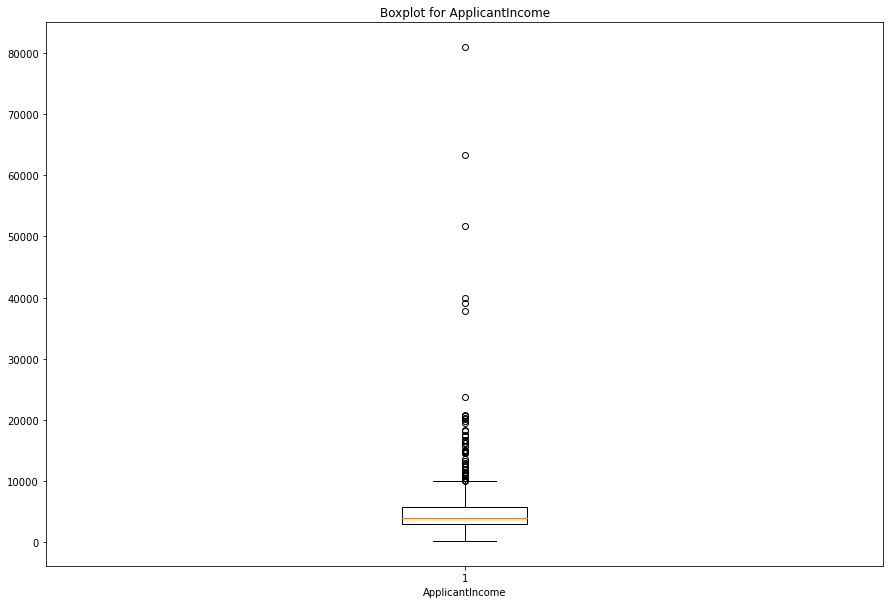

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.boxplot(df['ApplicantIncome'])
plt.title('Boxplot for ApplicantIncome')
plt.xlabel('ApplicantIncome')
plt.show()

In [55]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
dff_scaled = pd.DataFrame(robust_scaler.fit_transform(dff), columns=dff.columns)
print("Original DataFrame:")
print(dff)

print("\nDataFrame after Robust Scaling:")
dff_scaled


Original DataFrame:
     ApplicantIncome  Property_Area  Loan_Status  Fairfield  Hartford  \
0             5849.0            0.0            1        0.0       1.0   
1             4583.0            2.0            0        0.0       1.0   
2             3000.0            0.0            1        0.0       1.0   
3             2583.0            0.0            1        0.0       1.0   
4             6000.0            0.0            1        0.0       1.0   
..               ...            ...          ...        ...       ...   
609           2900.0            2.0            1        0.0       0.0   
610           4106.0            2.0            1        0.0       0.0   
611           8072.0            0.0            1        0.0       0.0   
612           7583.0            0.0            1        0.0       0.0   
613           4583.0            1.0            0        0.0       0.0   

     Litchfield  Middlesex  Connecticut  Graduate  Not Graduate   No  Yes  
0           0.0        0.0 

,ApplicantIncome,Property_Area,Loan_Status,Fairfield,Hartford,Litchfield,Middlesex,Connecticut,Graduate,Not Graduate,No,Yes
0,0.698482,-0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.254233,0.5,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.301254,-0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
3,-0.447583,-0.5,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0
4,0.751469,-0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.336345,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
610,0.086850,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
611,1.478551,-0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
612,1.306957,-0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
